# FIDE & Google Efficient Chess AI Challenge

In [2]:
import requests
from kaggle_environments import make

/Users/christiantaba/Library/Caches/pypoetry/virtualenvs/fide-google-efficient-chess-ai-challenge-d1fTRCS6-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


termcolor not installed, skipping dependency
No pygame installed, ignoring import


In [3]:
# インターネット接続の確認
requests.get("http://www.google.com", timeout=10).ok

True

## チェス用の環境構築
**前提知識**
- `agent.status`: エージェントの終了状態
    - ACTIVE:実行中
    - DONE:正常に終了
    - TIMEOUT:制限を超えたため終了
    - INVALID:無効なアクションを送信したため終了
    - CRASHED:エラーで終了
- `agent.observation.remainingOverageTime`: 各エージェントが持つ時間の残り（秒単位）

**MEMO**
- "random"の部分に自作したエージェント（クラス・関数）を指定すれば、「自作エージェント vs bot」の対局ができる

In [4]:
env = make("chess", debug=True)

Agent exit status/reward/time left: 
	 DONE / 0.5 / 10
	 DONE / 0.5 / 10





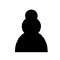
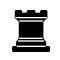
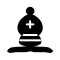
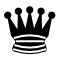
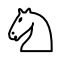
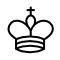
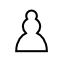
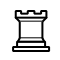
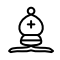
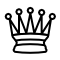
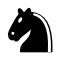
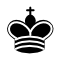

In [18]:
"""
env.run(["random", "random"])で、
ランダムな手を選択するエージェント同士で対局
"""
result = env.run(["random", "random"])

print("Agent exit status/reward/time left: ")
for agent in result[-1]:
    print("\t", agent.status, "/", agent.reward, "/", agent.observation.remainingOverageTime)
print("\n")

env.render(mode="ipython", width=500, height=500)

## 作成したbotで対戦

3 False B P
6 True P P
7 True P P
7 False R B
8 True P P
8 True R P
9 True P P
9 False R Q
10 False P P
11 True R N
15 False B R
16 False P N
19 False P R
22 False Q P
23 False Q P
24 True Q B
24 True Q P
25 True Q B
25 False Q P
34 False B P
35 False P B
36 False N P
Agent exit status/reward/time left: 
	 DONE / 0.5 / 10
	 DONE / 0.5 / 10





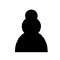
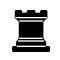
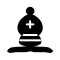
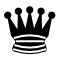
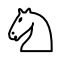
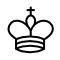
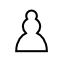
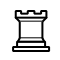
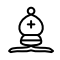
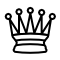
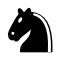
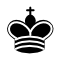

In [8]:
env = make("chess", debug=True)

result = env.run(["rulebase_bot.py", "baseline.py"])
# result = env.run(["random", "rulebase_bot.py"])
print("Agent exit status/reward/time left: ")
# look at the generated replay.json and print out the agent info
for agent in result[-1]:
    print("\t", agent.status, "/", agent.reward, "/", agent.observation.remainingOverageTime)
print("\n")
# render the game
env.render(mode="ipython", width=500, height=500)